In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
train_df = pd.read_csv('../../datasets/training_2nd_dataset.csv')
train_df['identifier'] = train_df['domain_name'] +'-'+ train_df['city'] +'-'+ train_df['isp'] +'-'+ train_df['node_name']

used_idx = train_df['identifier'].value_counts().index.tolist()[:-11547]
train_filtered = train_df.loc[train_df['identifier'].isin(used_idx)].copy()

In [3]:
i='domain_20'
tmp = train_filtered.loc[train_filtered['domain_name'] == i].copy()
print(f"{i}'s mean FBT is {tmp['avg_fbt_time'].mean()}")
print(f"{i}'s mean FBT is {tmp['avg_fbt_time'].std()}")

domain_20's mean FBT is 17.277418976809592
domain_20's mean FBT is 9.634438177425851


In [4]:
domain_lst = train_filtered['domain_name'].unique().tolist()

d_a_m = []
d_a_s = []
for i in domain_lst:
    tmp = train_filtered.loc[train_filtered['domain_name'] == i].copy()
    d_a_m.append(tmp['avg_fbt_time'].mean())
    d_a_s.append(tmp['avg_fbt_time'].std())

for x,y,z in zip(domain_lst, d_a_m, d_a_s):
    print(f"{x}'s mean FBT is {y:.4f}")
    print(f"{x}'s std FBT is {z:.4f}")
    print(f"{x}'s CV FBT is {z/y:.4f}")
    print("#"*41)

domain_4's mean FBT is 11.0107
domain_4's std FBT is 24.1190
domain_4's CV FBT is 2.1905
#########################################
domain_6's mean FBT is 8.8266
domain_6's std FBT is 13.9995
domain_6's CV FBT is 1.5861
#########################################
domain_10's mean FBT is 13.3201
domain_10's std FBT is 9.3572
domain_10's CV FBT is 0.7025
#########################################
domain_12's mean FBT is 10.9895
domain_12's std FBT is 7.8855
domain_12's CV FBT is 0.7175
#########################################
domain_8's mean FBT is 10.4522
domain_8's std FBT is 7.1384
domain_8's CV FBT is 0.6830
#########################################
domain_18's mean FBT is 12.2719
domain_18's std FBT is 7.7130
domain_18's CV FBT is 0.6285
#########################################
domain_20's mean FBT is 17.2774
domain_20's std FBT is 9.6344
domain_20's CV FBT is 0.5576
#########################################
domain_16's mean FBT is 8.1987
domain_16's std FBT is 5.1321
domain_16's CV F

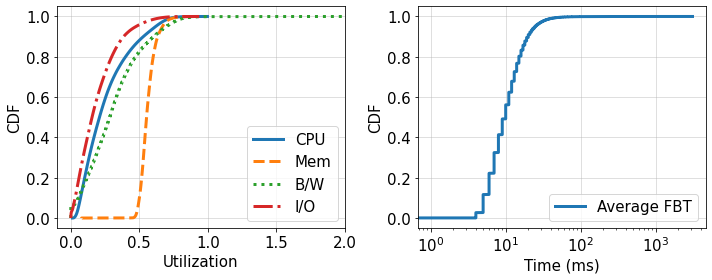

In [5]:
labels = ["CPU", "Mem", "B/W", "I/O"]
cols = ['cpu_util', 'mem_util','ng_traf_level','io_util_avg']

fig, axs = plt.subplots(1, 2, figsize = (10, 4))


train_df = train_filtered
ax0 = axs[0]
ax0.plot(sorted(train_df['cpu_util'].values),np.arange(len(train_df['cpu_util'].values)) / len(train_df['cpu_util'].values), color='tab:blue', ls='-',linewidth=3, label="CPU")
ax0.plot(sorted(train_df['mem_util'].values),np.arange(len(train_df['mem_util'].values)) / len(train_df['mem_util'].values), color='tab:orange', 
         ls='--',linewidth=3, label="Mem")
ax0.plot(sorted(train_df['ng_traf_level'].values),np.arange(len(train_df['ng_traf_level'].values)) / len(train_df['ng_traf_level'].values), color='#2ca02c', 
         ls=':',linewidth=3, label="B/W")
ax0.plot(sorted(train_df['io_util_avg'].values),np.arange(len(train_df['io_util_avg'].values)) / len(train_df['io_util_avg'].values), color='#d62728', 
         ls='-.',linewidth=3, label="I/O")
ax0.grid(alpha=0.5)
ax0.set_xlim(left=-0.1, right=2)
ax0.tick_params(axis='both', which='major', labelsize=15)
ax0.set_xlabel('Utilization' , fontsize=15)
ax0.set_ylabel('CDF', fontsize=15)
ax0.legend(fontsize=15)

ax1 = axs[1]
ax1.plot(sorted(train_df['avg_fbt_time'].values),np.arange(len(train_df['avg_fbt_time'].values)) / len(train_df['avg_fbt_time'].values), color='tab:blue', 
         ls='-',linewidth=3, label="Average FBT")
ax1.grid(alpha=0.5)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_xscale('log')
ax1.set_xlabel('Time (ms)' , fontsize=15)
ax1.set_ylabel('CDF', fontsize=15)
ax1.legend(fontsize=15)

fig.tight_layout()
# fig.savefig('../../latex/pvldbstyle-master/figures/qos_general_cdf.pdf')